In [104]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import pandas as pd

loc = r'D:\OneDrive - TU Eindhoven\Master thesis\Measurements\Calibration\NO3 cuvette\data.hdf5'
image_loc = r'D:\OneDrive - TU Eindhoven\Master thesis\Plots\Calibration\NO3 cuvette'
dependent = 'NO3-'
variable_name = '[NO3-] (mM)'
variable_factor = 1000
wavelength_range = [180, 400]
r2_values = [0.99, 1]
wavelength_plot_every = 5
plot_number = 3

In [105]:
if not os.path.exists(image_loc):
    os.makedirs(image_loc)

def save_loc(loc):
    return os.path.join(image_loc, loc)

In [106]:
with h5py.File(loc, 'r') as file:
    dark = file.attrs['dark'][:]
    reference = file.attrs['reference'][:]
    wavelength = file.attrs['wavelength'][:]
    measurements = []
    variable = []
    number = []
    for key in file.keys():
        measurements.append(file[key][:])
        variable.append(file[key].attrs[dependent])
        number.append(int(key.split('_')[1].split('.')[0]))

measurements = np.array(measurements)
dark = np.array(dark)
reference = np.array(reference)
wavelength = np.array(wavelength)
variable = np.array(variable)
number = np.array(number)
absorbance = -np.log10((measurements-dark) / (reference-dark))
mask = (wavelength_range[0] < wavelength) & (wavelength < wavelength_range[1])

absorbance_m = absorbance[:,mask]
wavelength_m = wavelength[mask]
dark_m = dark[mask]
reference_m = reference[mask]

absorbance_m_num = absorbance_m[number==plot_number]
variable_num = variable[number==plot_number]


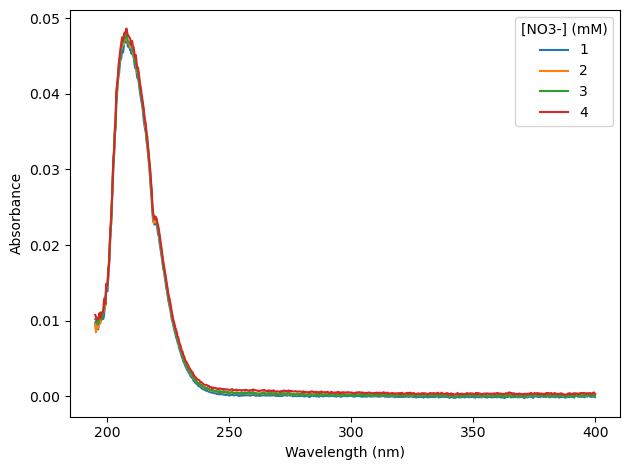

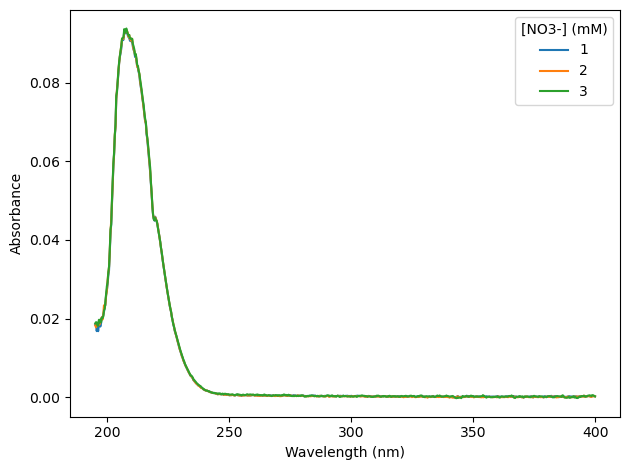

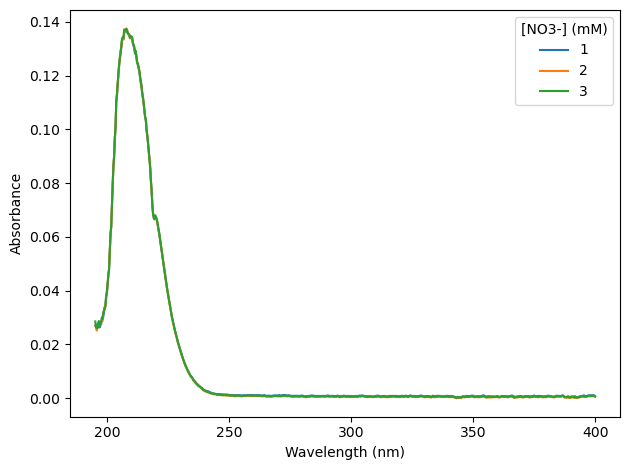

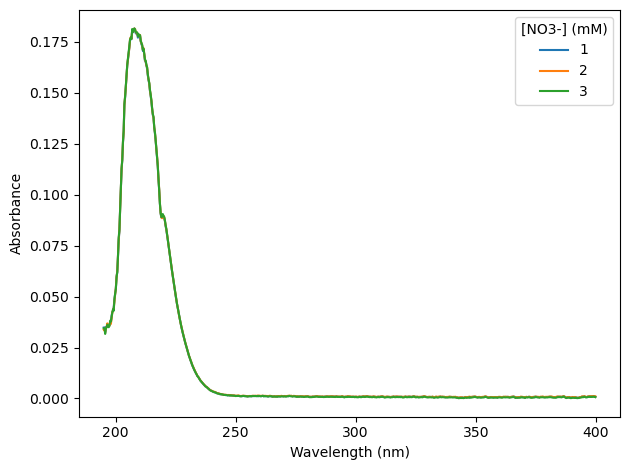

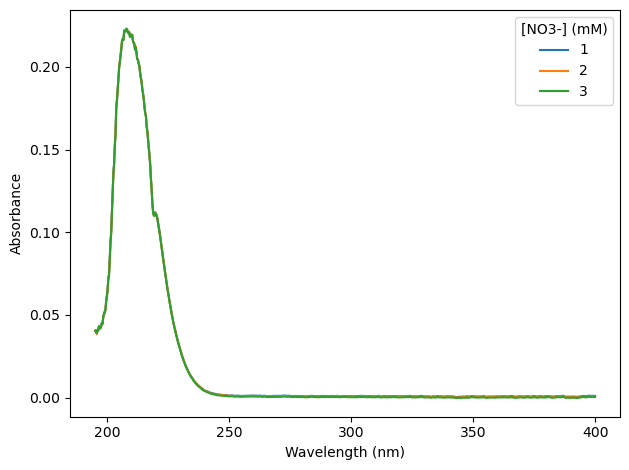

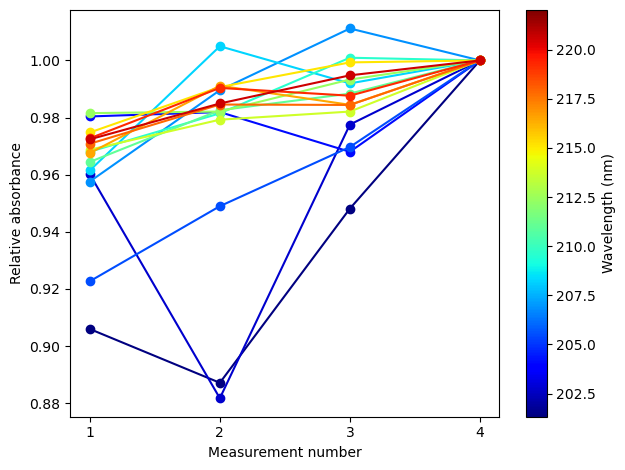

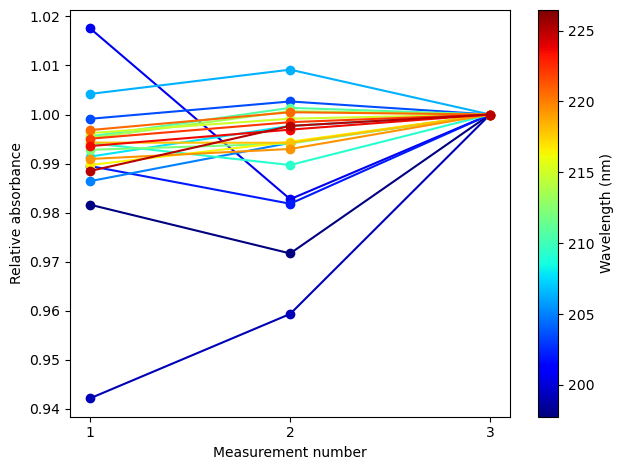

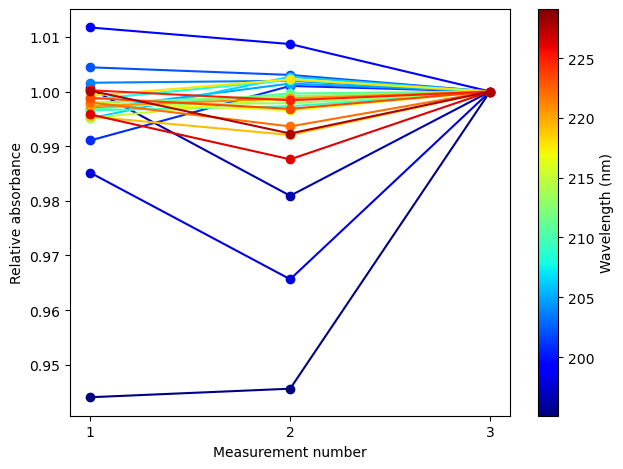

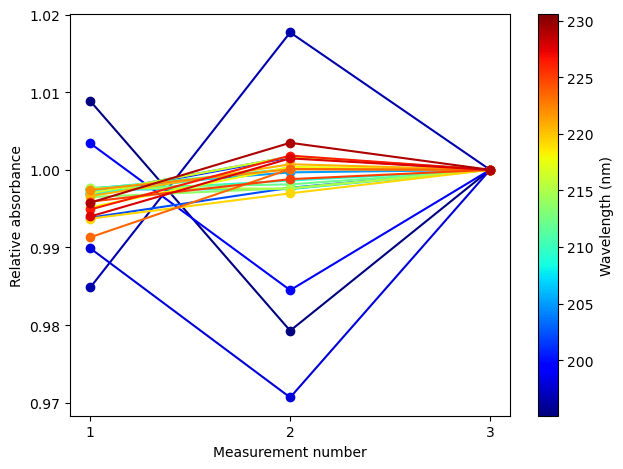

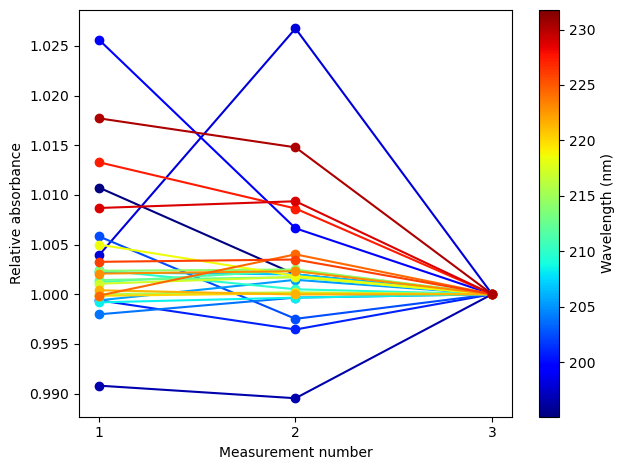

In [107]:
for value in np.unique(variable):
    plt.figure()
    for index, num in enumerate(number[variable == value]):
        plt.plot(wavelength_m, absorbance_m[(number == num) & (variable == value)].T, f'C{index}', label=num)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absorbance')
    plt.legend(title=variable_name)
    plt.tight_layout()
    plt.savefig(save_loc(f'absorbance vs wavelength {value} {variable_name}.png'))
    plt.show()

cmap = plt.get_cmap('jet')
for value in np.unique(variable):
    plt.figure()
    wav_abs_mask = absorbance_m[(variable == value)][-1, :] > 0.02
    for index, wav in enumerate(wavelength_m[wav_abs_mask][::wavelength_plot_every]):
        vals = absorbance_m[(variable == value)].T[::wavelength_plot_every][index]
        plt.plot(number[variable == value], vals/vals[-1], 'o-', color=cmap(index/len(wavelength_m[wav_abs_mask][::wavelength_plot_every])))   
    plt.xlabel('Measurement number')
    plt.ylabel('Relative absorbance')
    plt.xticks(number[variable == value])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=wavelength_m[wav_abs_mask][0], vmax=wavelength_m[wav_abs_mask][-1]))
    plt.colorbar(sm, label='Wavelength (nm)', ax=plt.gca())
    plt.tight_layout()
    plt.savefig(save_loc(f'absorbance vs measurement number {value} {variable_name}.png'))
    plt.show()

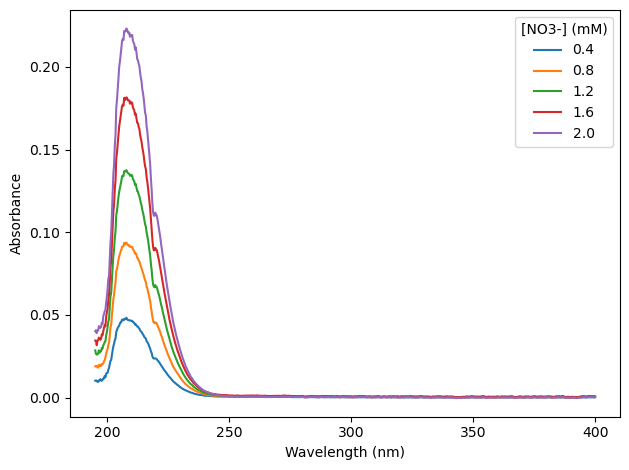

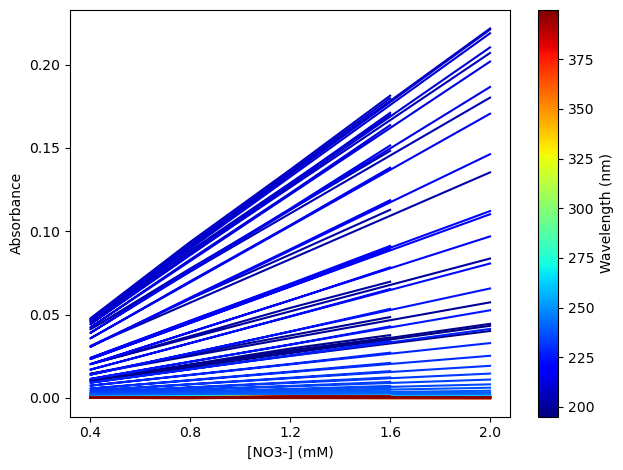

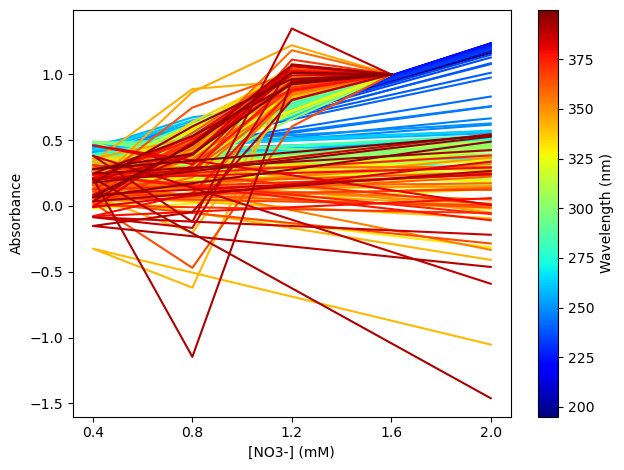

In [108]:
# plot absorbance vs variable
plt.figure()
for index, var in enumerate(np.unique(variable)):
    plt.plot(wavelength_m, absorbance_m[(number == plot_number) & (variable == var)].T, f'C{index}', label=variable_factor*var)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.legend(title=variable_name)
plt.tight_layout()
plt.savefig(save_loc(f'absorbance vs wavelength.png'))
plt.show()

cmap = plt.get_cmap('jet')
plt.figure()
for index, wav in enumerate(wavelength_m[::wavelength_plot_every]):
    plt.plot(variable_factor*variable_num, absorbance_m_num.T[::wavelength_plot_every][index], color=cmap(index/len(wavelength_m[::wavelength_plot_every])))
plt.xlabel(variable_name)
plt.ylabel('Absorbance')
plt.xticks(variable_factor*variable_num)
# make a cmap for the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=wavelength_m[0], vmax=wavelength_m[-1]))
plt.colorbar(sm, label='Wavelength (nm)', ax=plt.gca())
plt.tight_layout()
plt.savefig(save_loc(f'absorbance vs {variable_name}.png'))
plt.show()

cmap = plt.get_cmap('jet')
plt.figure()
for index, wav in enumerate(wavelength_m[::wavelength_plot_every]):
    vals = absorbance_m_num.T[::wavelength_plot_every][index]
    plt.plot(variable_factor*variable_num, vals/vals[-1], color=cmap(index/len(wavelength_m[::wavelength_plot_every])))
plt.xlabel(variable_name)
plt.ylabel('Absorbance')
plt.xticks(variable_factor*variable_num)
# make a cmap for the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=wavelength_m[0], vmax=wavelength_m[-1]))
plt.colorbar(sm, label='Wavelength (nm)', ax=plt.gca())
plt.tight_layout()
plt.savefig(save_loc(f'absorbance vs {variable_name} relative.png'))
plt.show()

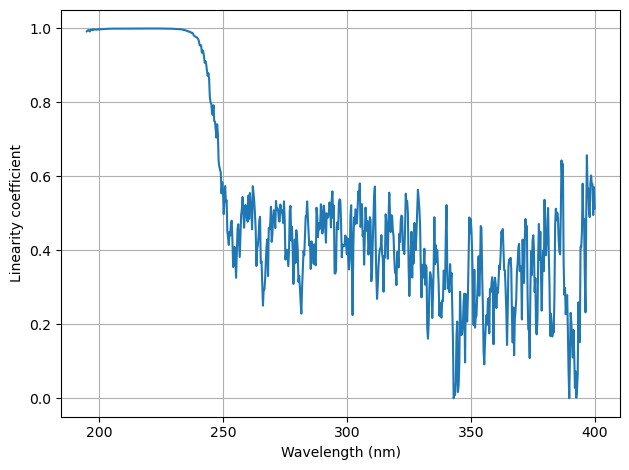

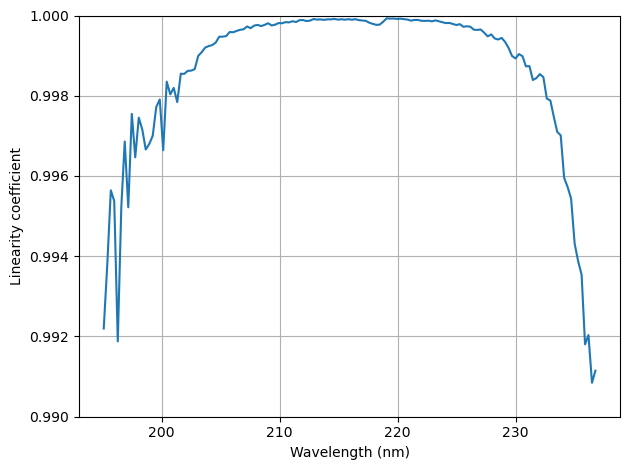

In [109]:
# pearson r for each wavelength
linearity = np.zeros(len(wavelength_m))
for i in range(len(wavelength_m)):
    linearity[i] = scipy.stats.pearsonr(variable, absorbance_m[:,i])[0]

plt.figure()
plt.plot(wavelength_m, linearity**2)
plt.xlabel('Wavelength (nm)')  
plt.ylabel('Linearity coefficient')
plt.grid()
plt.tight_layout()
plt.savefig(save_loc(f'linearity vs wavelength.png'))
plt.show()

r2_mask = (r2_values[0] < linearity**2) & (linearity**2 < r2_values[1])
plt.figure()
plt.plot(wavelength_m[r2_mask], linearity[r2_mask]**2)
plt.xlabel('Wavelength (nm)')  
plt.ylabel('Linearity coefficient')
plt.grid()
plt.ylim(*r2_values)
plt.tight_layout()
plt.savefig(save_loc(f'linearity vs wavelength zoomed.png'))
plt.show()

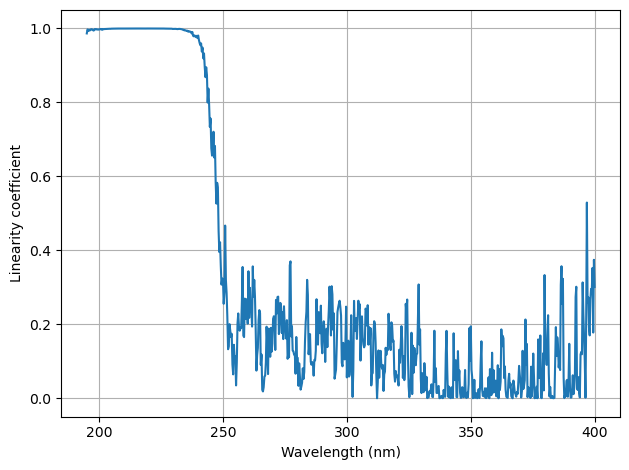

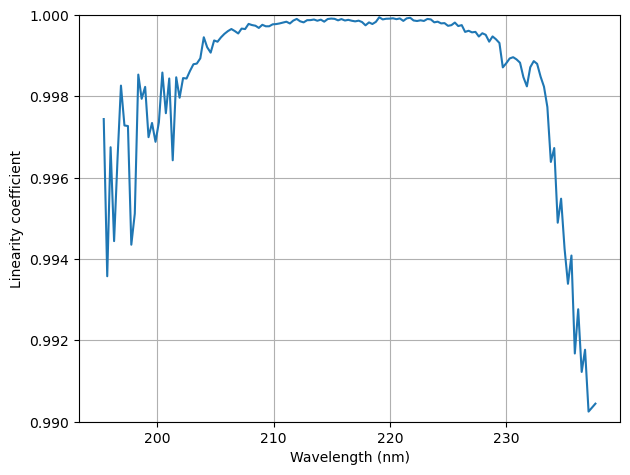

In [110]:
# pearson r for each wavelength
linearity = np.zeros(len(wavelength_m))
for i in range(len(wavelength_m)):
    linearity[i] = scipy.stats.pearsonr(variable_num[0:], absorbance_m_num[0:, i])[0]

plt.figure()
plt.plot(wavelength_m, linearity**2)
plt.xlabel('Wavelength (nm)')  
plt.ylabel('Linearity coefficient')
plt.grid()
plt.tight_layout()
plt.savefig(save_loc(f'linearity vs wavelength (without first).png'))
plt.show()

r2_mask = (r2_values[0] < linearity**2) & (linearity**2 < r2_values[1])
plt.figure()
plt.plot(wavelength_m[r2_mask], linearity[r2_mask]**2)
plt.xlabel('Wavelength (nm)')  
plt.ylabel('Linearity coefficient')
plt.grid()
plt.tight_layout()
plt.ylim(*r2_values)
plt.savefig(save_loc(f'linearity vs wavelength zoomed (without first).png'))
plt.show()